In [51]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime as dt
import math
from scipy import optimize as op

Yield To Maturity

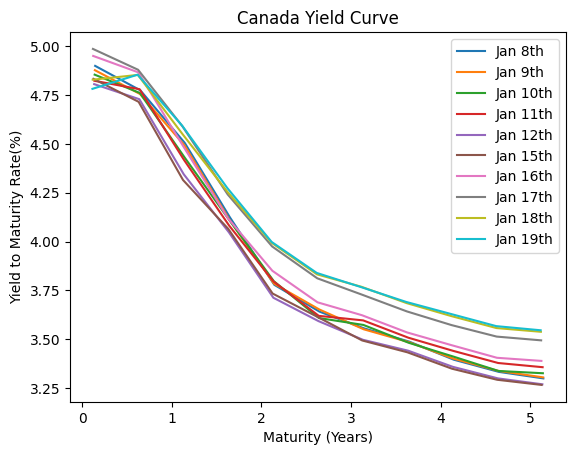

In [52]:
clean_price = np.array([[99.63,99.64,99.65,99.661,99.67,99.687,99.68,99.683,99.708,99.72],
[97.96, 97.98,97.985,97.982,98.021,98.054,97.974,97.975,97.999, 98.007],
[96.46,96.482,96.552,96.576,96.661,96.715,96.54,96.448,96.495,96.46],
[94.34,94.37,94.38,94.43,94.49,94.49,94.42,94.25,94.24,94.22],
[92.862,92.86,92.844,92.856,93.023,93.008,92.796,92.57,92.546,92.545],
[93.46,93.44,93.55,93.53,93.6,93.57,93.4,93.12,93.08,93.07],
[93.282,93.301,93.245,93.186,93.467,93.493,93.141,92.856,92.753,92.764],
[97.58,97.591,97.603,97.52,97.74,97.772,97.441,97.092,96.956,96.94],
[100.5,100.48,100.439,100.328,100.637,100.673,100.22,99.834,99.662,99.623],
[99.74,99.72,99.72,99.55,99.88,99.91,99.44,98.99,98.81,98.77],
[103.406, 103.38, 103.279, 103.132, 103.542, 103.552, 102.974, 102.483, 102.279, 102.242]])

clean_price=np.transpose(clean_price)

coupon=np.array([2.25, 1.5, 1.25, 0.5, 0.25, 1.00, 1.25, 2.75, 3.5, 3.25, 4.00])
x=np.array([dt.datetime(2024,1,8), dt.datetime(2024,1,9), dt.datetime(2024,1,10),
           dt.datetime(2024,1,11), dt.datetime(2024,1,12), dt.datetime(2024,1,15),
           dt.datetime(2024,1,16), dt.datetime(2024,1,17), dt.datetime(2024,1,18),
           dt.datetime(2024,1,19)])

last_coupon_date=dt.datetime(2023,9,1)
expiry_date=np.array([dt.datetime(2024, 3, 1),dt.datetime(2024, 9, 1),dt.datetime(2025, 3, 1),
             dt.datetime(2025, 9, 1),dt.datetime(2026, 3, 1),dt.datetime(2026, 9, 1),
             dt.datetime(2027, 3, 1),dt.datetime(2027, 9, 1),dt.datetime(2028, 3, 1),
             dt.datetime(2028, 9, 1), dt.datetime(2029, 3, 1)])

my=[ [] for _ in range(10) ] #maturity in years
dirty_price=[ [] for _ in range(10) ]

for j in range(10): #10 days we collected data from
  for i in range(11): #11 bonds
    my[j].append((expiry_date[i]-x[j]).days/365)
    dirty_price[j].append(clean_price[j][i] + coupon[i]*((x[j]-last_coupon_date).days/365))

dirty_price=np.array(dirty_price)
my=np.array(my)

ytm = [] #yield to maturity
for j in range(10):
  ytm.append([])
  def f(x):
    return ((100+coupon[0]/2)/((1+x)**my[j][0])-dirty_price[j][0])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[1]/(2*(1+x)**my[j][0])+(100+coupon[1]/2)/((1+x)**my[j][1])-dirty_price[j][1])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[2]/(2*(1+x)**my[j][0])+coupon[2]/(2*(1+x)**my[j][1])+(100+coupon[2]/2)/((1+x)**my[j][2])-dirty_price[j][2])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[3]/(2*(1+x)**my[j][0])+coupon[3]/(2*(1+x)**my[j][1])+coupon[3]/(2*(1+x)**my[j][2])+(100+coupon[3]/2)/((1+x)**my[j][3])-dirty_price[j][3])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[4]/(2*(1+x)**my[j][0])+coupon[4]/(2*(1+x)**my[j][1])+coupon[4]/(2*(1+x)**my[j][2])+coupon[4]/(2*(1+x)**my[j][3])+(100+coupon[4]/2)/((1+x)**my[j][4])-dirty_price[j][4])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[5]/(2*(1+x)**my[j][0])+coupon[5]/(2*(1+x)**my[j][1])+coupon[5]/(2*(1+x)**my[j][2])+coupon[5]/(2*(1+x)**my[j][3])+coupon[5]/(2*(1+x)**my[j][4])+(100+coupon[5]/2)/((1+x)**my[j][5])-dirty_price[j][5])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[6]/(2*(1+x)**my[j][0])+coupon[6]/(2*(1+x)**my[j][1])+coupon[6]/(2*(1+x)**my[j][2])+coupon[6]/(2*(1+x)**my[j][3])+coupon[6]/(2*(1+x)**my[j][4])+coupon[6]/(2*(1+x)**my[j][5])+(100+coupon[6]/2)/((1+x)**my[j][6])-dirty_price[j][6])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[7]/(2*(1+x)**my[j][0])+coupon[7]/(2*(1+x)**my[j][1])+coupon[7]/(2*(1+x)**my[j][2])+coupon[7]/(2*(1+x)**my[j][3])+coupon[7]/(2*(1+x)**my[j][4])+coupon[7]/(2*(1+x)**my[j][5])+coupon[7]/(2*(1+x)**my[j][6])+(100+coupon[7]/2)/((1+x)**my[j][7])-dirty_price[j][7])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[8]/(2*(1+x)**my[j][0])+coupon[8]/(2*(1+x)**my[j][1])+coupon[8]/(2*(1+x)**my[j][2])+coupon[8]/(2*(1+x)**my[j][3])+coupon[8]/(2*(1+x)**my[j][4])+coupon[8]/(2*(1+x)**my[j][5])+coupon[8]/(2*(1+x)**my[j][6])+coupon[8]/(2*(1+x)**my[j][7])+(100+coupon[8]/2)/((1+x)**my[j][8])-dirty_price[j][8])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[9]/(2*(1+x)**my[j][0])+coupon[9]/(2*(1+x)**my[j][1])+coupon[9]/(2*(1+x)**my[j][2])+coupon[9]/(2*(1+x)**my[j][3])+coupon[9]/(2*(1+x)**my[j][4])+coupon[9]/(2*(1+x)**my[j][5])+coupon[9]/(2*(1+x)**my[j][6])+coupon[9]/(2*(1+x)**my[j][7])+coupon[9]/(2*(1+x)**my[j][8])+(100+coupon[9]/2)/((1+x)**my[j][9])-dirty_price[j][9])
  ytm[j].append(op.newton(f,0))
  def f(x):
    return (coupon[10]/(2*(1+x)**my[j][0])+coupon[10]/(2*(1+x)**my[j][1])+coupon[10]/(2*(1+x)**my[j][2])+coupon[10]/(2*(1+x)**my[j][3])+coupon[10]/(2*(1+x)**my[j][4])+coupon[10]/(2*(1+x)**my[j][5])+coupon[10]/(2*(1+x)**my[j][6])+coupon[10]/(2*(1+x)**my[j][7])+coupon[10]/(2*(1+x)**my[j][8])+coupon[10]/(2*(1+x)**my[j][9])+(100+coupon[10]/2)/((1+x)**my[j][10])-dirty_price[j][10])
  ytm[j].append(op.newton(f,0))

ytm=np.multiply(ytm,100)

for i in range(5):
  plt.plot(my[i], ytm[i], label=f"Jan {i+8}th")
for i in range(5):
  plt.plot(my[i+5], ytm[i+5], label=f"Jan {i+15}th")
plt.title("Canada Yield Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield to Maturity Rate(%)")
plt.legend()
plt.show()

int_ytm_rate=[] #we want to use linear approximation to find the spot rate at 0.5yr, 1yr, ... using the graph above.

for j in range(10):
  int_ytm_rate.append([])
  for i in range(5):
    int_ytm_rate[j].append(ytm[j][2*i+1]+(ytm[j][2*i+2]-ytm[j][2*i+1])*(i+1-my[j][2*i+1])/(my[j][2*i+2]-my[j][2*i+1]))



Spot Rate

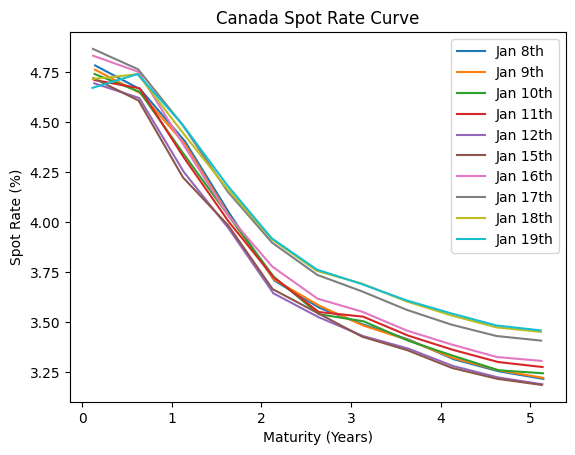

In [53]:
rate=[ [] for _ in range(10) ] #annual spot rate * time interval using continuous compounding
annual_rate=[ [] for _ in range(10) ] #annual spot rate using continuous compounding

for j in range(10):
  rate[j].append(-math.log(dirty_price[j][0]/(100+coupon[0]/2)))
  for i in range(1, 11):
    for a in rate[j]:
      dirty_price[j][i]=dirty_price[j][i]-math.exp(-a)*coupon[i]/2
    rate[j].append(-math.log(dirty_price[j][i]/(100+coupon[i]/2)))

annual_rate=np.divide(rate,my)
annual_rate=np.multiply(annual_rate, 100)

for i in range(5):
  plt.plot(my[i], annual_rate[i], label=f"Jan {i+8}th")
for i in range(5):
  plt.plot(my[i+5], annual_rate[i+5], label=f"Jan {i+15}th")
plt.title("Canada Spot Rate Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Spot Rate (%)")
plt.legend()
plt.show()


Forward Rate

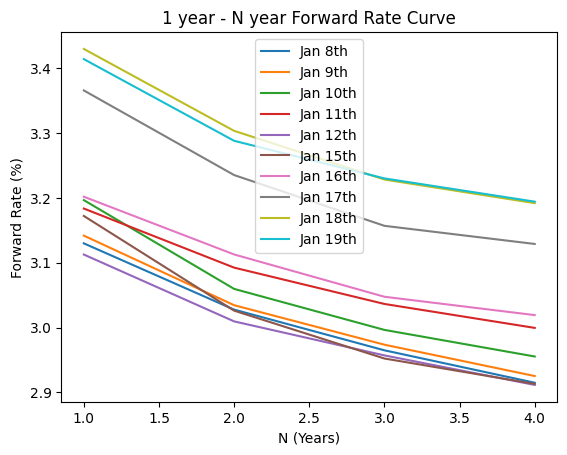

In [54]:
int_annual_rate=[] #we want to use linear approximation to find the spot rate at 0.5yr, 1yr, ... using the graph above.

for j in range(10):
  int_annual_rate.append([])
  for i in range(5):
    int_annual_rate[j].append(annual_rate[j][2*i+1]+(annual_rate[j][2*i+2]-annual_rate[j][2*i+1])*(i+1-my[j][2*i+1])/(my[j][2*i+2]-my[j][2*i+1]))


forward_rate=[]

for j in range(10):
  forward_rate.append([])
  for i in range(1, 5):
    forward_rate[j].append((int_annual_rate[j][i]*(i+1)-int_annual_rate[j][0])/i)

m = [i for i in range(1,5)]
for i in range(5):
  plt.plot(m, forward_rate[i], label=f"Jan {i+8}th")
for i in range(5):
  plt.plot(m, forward_rate[i+5], label=f"Jan {i+15}th")
plt.title("1 year - N year Forward Rate Curve")
plt.xlabel("N (Years)")
plt.ylabel("Forward Rate (%)")
plt.legend()
plt.show()


 Covariance matrix for the time series of daily log-returns of yield

In [55]:

time_series1 = []

for i in range(5): #5 rates
  time_series1.append([])
  for j in range(9):#9 day intervals
     time_series1[i].append(math.log(int_ytm_rate[j+1][i]/int_ytm_rate[j][i]))

cov1=np.cov(time_series1)

print(np.round(cov1*10000,2))

eigenvalues1, eigenvectors1 = np.linalg.eig(cov1)
print(eigenvalues1)
print(np.round(eigenvectors1,2))


#eigenvalues and eigenvectors

[[2.66 2.01 2.3  2.35 2.48]
 [2.01 2.19 2.36 2.36 2.51]
 [2.3  2.36 2.74 2.79 2.98]
 [2.35 2.36 2.79 2.89 3.07]
 [2.48 2.51 2.98 3.07 3.29]]
[1.29288780e-03 6.15827432e-05 2.05579955e-05 7.77653607e-07
 7.09357714e-07]
[[-0.41 -0.91 -0.06 -0.03 -0.  ]
 [-0.4   0.12  0.87 -0.09  0.25]
 [-0.46  0.19  0.03  0.31 -0.81]
 [-0.47  0.21 -0.33  0.59  0.53]
 [-0.5   0.27 -0.36 -0.74  0.05]]


 Covariance matrix for the time series of daily log-returns of forward rates

In [56]:
time_series = []

for i in range(4): #4 rates
  time_series.append([])
  for j in range(9):#9 day intervals
     time_series[i].append(math.log(forward_rate[j+1][i]/forward_rate[j][i]))


cov2=np.cov(time_series)

print(np.round(cov2*10000,2))

eigenvalues2, eigenvectors2 = np.linalg.eig(cov2)
print(eigenvalues2)
print(np.round(eigenvectors2,2))

[[4.14 3.29 2.88 3.02]
 [3.29 3.68 3.57 3.78]
 [2.88 3.57 3.6  3.8 ]
 [3.02 3.78 3.8  4.05]]
[1.40538350e-03 1.37706850e-04 2.26362919e-06 1.92863361e-06]
[[-0.47 -0.86  0.18 -0.1 ]
 [-0.51  0.07 -0.72  0.46]
 [-0.49  0.34 -0.12 -0.79]
 [-0.52  0.38  0.66  0.39]]
